# Bike Sharing assignment

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


#surpress warnings
import warnings
warnings.filterwarnings('ignore')

# STEP 1 : Reading, Understanding and Visualising the Data

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Cleaning

1. Dropping columns:
- Dropping dteday column as we have year and month in yr and mnth columns.
- Casual + registered = cnt so dropping columns casual and registered.
- instant is an index column so dropping it


In [7]:
column1=["instant","dteday","casual","registered"]

bike=bike.drop(columns=column1,axis=1)

In [8]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# renaming columns for clearity

bike.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


We have categorical columns in our dataset: 
season,
month,
weathersit,
weekday

Will map the categorical columns to it's actual category name.

In [10]:
# Mapping seasons into its categories

season_cat={1:"spring",2:"summer",3:"fall",4:'winter'}

bike.season=[season_cat[item] for item in bike.season]

In [11]:
# Mapping weathersit into its categories

weather_cat={1:"clear",2:"mist & cloudy",3:"light rain & snow",4:'heavy rain & snow'}

bike.weathersit=[weather_cat[item] for item in bike.weathersit]

In [12]:
# Mapping month into its categories

month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}

bike.month=[month_cat[item] for item in bike.month]

In [13]:
# Mapping weekday into its categories

wkday_cat={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}

bike.weekday=[wkday_cat[item] for item in bike.weekday]

In [14]:
# Mapping Year into its categories

yr_cat={0: '2018',1: '2019'}

bike.year=[yr_cat[item] for item in bike.year]

In [15]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Saturday,0,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data

We have count as our target variable, analyzing the data w.r.t count variable

### 1. Season

<AxesSubplot:xlabel='season', ylabel='count'>

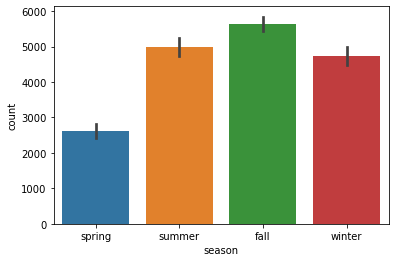

In [16]:
sns.barplot(x='season',y='count',data=bike)

Inferences: Renting of bikes in more in the fall season.

### 2. Year

<AxesSubplot:xlabel='year', ylabel='count'>

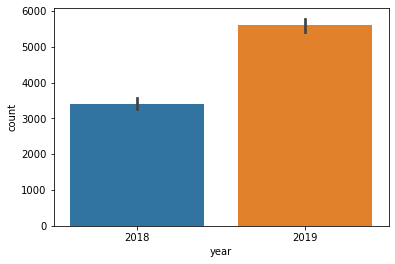

In [17]:
sns.barplot(x='year',y='count',data=bike)

Inferences: Renting of bikes has incresed in 2019.

### 3. Month

<AxesSubplot:xlabel='month', ylabel='count'>

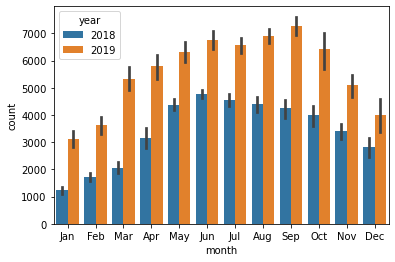

In [18]:
sns.barplot(x='month', y = 'count', data=bike , hue = 'year')

Inferences : We could observe bike rented are more for sep in 2019 and jun in 2018

### 4. Weekday

<AxesSubplot:xlabel='weekday', ylabel='count'>

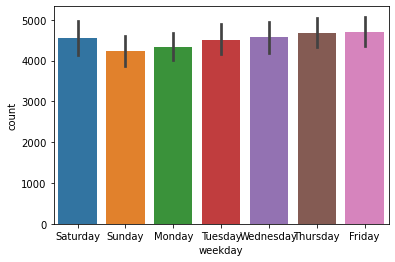

In [19]:
sns.barplot(x='weekday',y='count',data=bike)

Inference: Bike rentals are high on thursday,friday

### 5. Working day :
0 : holiday or weekend
1 : neither holiday nor weekend ie., working day

<AxesSubplot:xlabel='workingday', ylabel='count'>

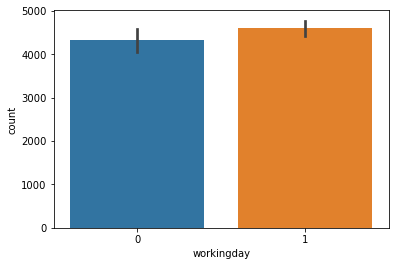

In [20]:
sns.barplot(x='workingday',y='count',data=bike)

Inferences : Bikes are rented more on working days

### 6. weathersit

<AxesSubplot:xlabel='weathersit', ylabel='count'>

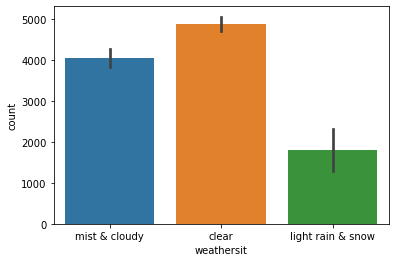

In [21]:
sns.barplot(x='weathersit',y='count',data=bike)

Inferences: on days with clear weather renting of bikes were more  

### 7. Temperature

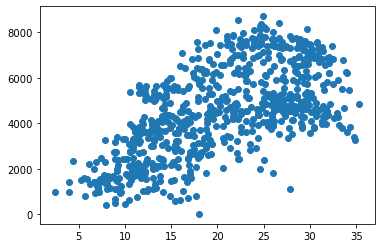

In [22]:
plt.scatter('temp','count',data=bike)

Inferences: Bike rental counts show a positive correlation with temp i.e it increases at a high temperature

### 8.Feeling temperature

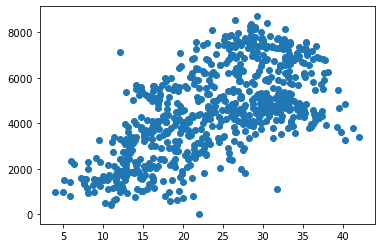

In [23]:
plt.scatter('atemp','count',data=bike)


Inferences: Bike rental counts show a positive correlation with feeling temperature i.e it increases at a high temperature:

### 9. Humidity

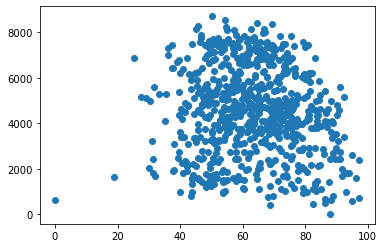

In [24]:
plt.scatter('humidity','count',data=bike)


Inferences: Bike rental count shows negative correlation with Humidity i.e bike rental count is less at high humidity

### 10. Windspeed

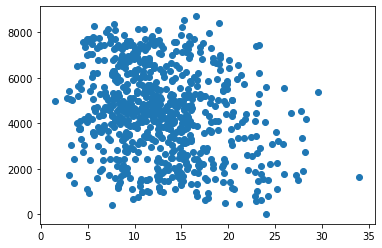

In [25]:
plt.scatter('windspeed','count',data=bike)

Inferences: Bike rental count shows negative correlation with Windspeed i.e bike rental count is less at high windspeed

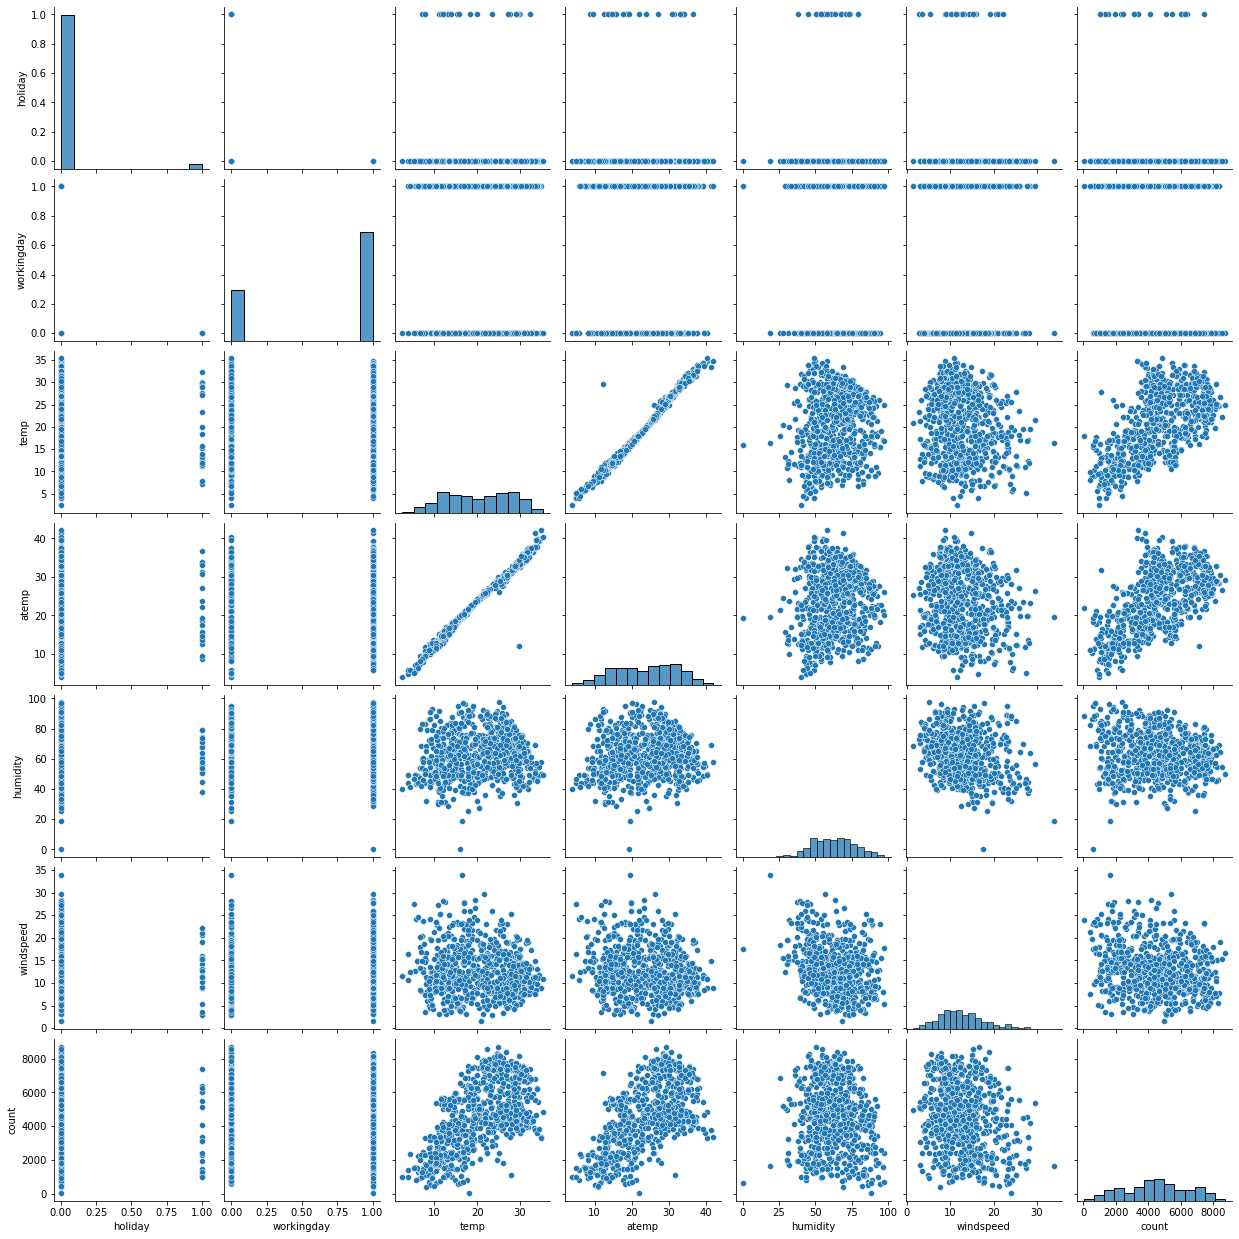

In [26]:
sns.pairplot(bike)

### Checking Correlations

<AxesSubplot:>

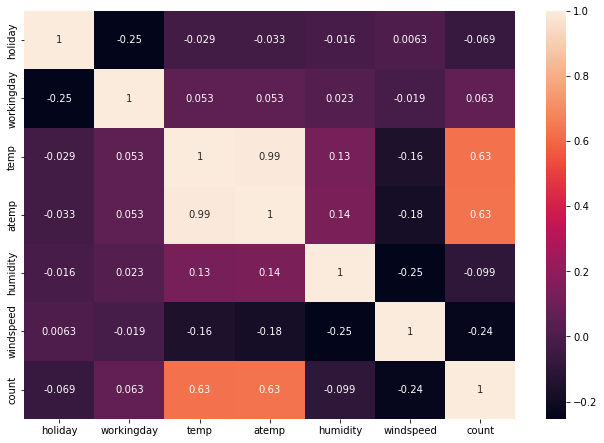

In [27]:
plt.figure(figsize=(11,7.5))
sns.heatmap(bike.corr(),annot=True)

Inferences: We see high correlation between temp and atemp i.e 0.99. hence we will drop atemp column to avoid multicollinearity.

# Step 2 : Preparing the Data

In [28]:
bike=bike.drop("atemp",axis=1)

In [29]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,Jan,0,Saturday,0,mist & cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,mist & cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


Dealing With Categorical Variables: </n>
Creating Dummy variables

In [30]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

years = pd.get_dummies(bike['year'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

In [31]:
bike= pd.concat([bike,seasons,years,weather,month,week_day],axis=1)

In [32]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,2018,Jan,0,Saturday,0,mist & cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,2018,Jan,0,Sunday,0,mist & cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,2018,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# Dropping categorical variables as we have created dummy variables.

bike.drop(['season','weathersit','weekday','month','year'],axis=1,inplace=True)

In [34]:
bike.head()

,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2019,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Spliting data into train and test

In [35]:
bike.shape

(730, 29)

In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
df_train.shape

(510, 29)

In [38]:
df_test.shape

(219, 29)

### Scaling Features

We will use MinMax Scaler to scale the countinuous avriables.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
vars = ['windspeed' , 'temp' , 'humidity','count']

df_train[vars] = scaler.fit_transform(df_train[vars])

df_train.head()

,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2019,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


### Dividing into X and y dataset

In [41]:
y_train = df_train.pop('count')
X_train = df_train

# Step 3 : Training the model

Here we will use mixed approach, We will use RFE (Recursive Feature Elimination) for automated approach and for manual approach we will delete 1 variable at a time by ovserving pvalues and VIF

In [227]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [257]:
# Running RFE with selecting 15 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 15)             # running RFE,10 is the number of variables we want RFE to select
rfe = rfe.fit(X_train, y_train)

In [258]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('light rain & snow', True, 1),
 ('mist & cloudy', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 5),
 ('Thursday', False, 11),
 ('Tuesday', False, 8),
 ('Wednesday', False, 12)]

In [259]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'spring',
       'summer', 'winter', '2019', 'light rain & snow', 'mist & cloudy', 'Jan',
       'Jul', 'Sep', 'Saturday'],
      dtype='object')

In [260]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [261]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [262]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [263]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.31e-191
Time:                        19:00:14   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.036      6.949      0.000       0.180       0.322
holiday              -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday            0.0435      0.012      3.781      0.000       0.021       0.066
temp                  0.5098      0.034     14.851      0.000       0.442       0.577
humidity             -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed            -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring               -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer                0.0497      0.015      3.346      0.001       0.020       0.079
winter                0.0944      0.017      5.479      0.000       0.061       0.128
2019                  0.2305      0.008     28.807      0.000       0.215       0.246
light rain & snow    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
mist & cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
Jan                  -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul                  -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep                   0.0812      0.016      4.934      0.000       0.049       0.114
Saturday              0.0537      0.014      3.707      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In above model according to the P value all the variables are significant, so we will check VIF to see if multicollinearity exists.

In [264]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,humidity,1.92
2,workingday,1.88
15,Saturday,1.78
11,mist & cloudy,1.57
12,Jan,1.57


In [265]:
X_train_new= X_train_rfe.drop('const',1)


In [266]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.31e-191
Time:                        19:00:28   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.036      6.949      0.000       0.180       0.322
holiday              -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday            0.0435      0.012      3.781      0.000       0.021       0.066
temp                  0.5098      0.034     14.851      0.000       0.442       0.577
humidity             -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed            -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring               -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer                0.0497      0.015      3.346      0.001       0.020       0.079
winter                0.0944      0.017      5.479      0.000       0.061       0.128
2019                  0.2305      0.008     28.807      0.000       0.215       0.246
light rain & snow    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
mist & cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
Jan                  -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul                  -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep                   0.0812      0.016      4.934      0.000       0.049       0.114
Saturday              0.0537      0.014      3.707      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.40
2,temp,17.77
1,workingday,5.31
4,windspeed,4.73
5,spring,4.53
7,winter,3.48
6,summer,2.84
10,mist & cloudy,2.29
8,2019,2.09
14,Saturday,1.98


In [268]:
X_train_new= X_train_new.drop('humidity',1)


In [271]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          7.33e-189
Time:                        19:01:54   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1737      0.031      5.525      0.000       0.112       0.235
holiday              -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday            0.0465      0.012      3.983      0.000       0.024       0.069
temp                  0.4728      0.034     14.037      0.000       0.407       0.539
windspeed            -0.1563      0.025     -6.292      0.000      -0.205      -0.107
spring               -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer                0.0434      0.015      2.890      0.004       0.014       0.073
winter                0.0797      0.017      4.650      0.000       0.046       0.113
2019                  0.2344      0.008     29.019      0.000       0.218       0.250
light rain & snow    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
mist & cloudy        -0.0826      0.009     -9.592      0.000      -0.100      -0.066
Jan                  -0.0389      0.018     -2.215      0.027      -0.073      -0.004
Jul                  -0.0482      0.018     -2.635      0.009      -0.084      -0.012
Sep                   0.0753      0.017      4.522      0.000       0.043       0.108
Saturday              0.0584      0.015      3.980      0.000       0.030       0.087
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.07
1,workingday,5.24
3,windspeed,4.67
4,spring,3.08
5,summer,2.33
7,2019,2.08
6,winter,1.99
13,Saturday,1.97
10,Jan,1.62
11,Jul,1.59


In [273]:
X_train_new= X_train_new.drop('workingday',1)


In [275]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.21e-186
Time:                        19:02:48   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2121      0.030      6.986      0.000       0.152       0.272
holiday              -0.0939      0.026     -3.614      0.000      -0.145      -0.043
temp                  0.4741      0.034     13.868      0.000       0.407       0.541
windspeed            -0.1570      0.025     -6.231      0.000      -0.207      -0.108
spring               -0.0613      0.021     -2.895      0.004      -0.103      -0.020
summer                0.0425      0.015      2.791      0.005       0.013       0.072
winter                0.0769      0.017      4.425      0.000       0.043       0.111
2019                  0.2346      0.008     28.628      0.000       0.219       0.251
light rain & snow    -0.2869      0.025    -11.668      0.000      -0.335      -0.239
mist & cloudy        -0.0808      0.009     -9.256      0.000      -0.098      -0.064
Jan                  -0.0383      0.018     -2.146      0.032      -0.073      -0.003
Jul                  -0.0512      0.019     -2.758      0.006      -0.088      -0.015
Sep                   0.0760      0.017      4.498      0.000       0.043       0.109
Saturday              0.0201      0.011      1.788      0.074      -0.002       0.042
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
X_train_new= X_train_new.drop('Saturday',1)


In [277]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.97e-187
Time:                        19:03:17   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2155      0.030      7.096      0.000       0.156       0.275
holiday              -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp                  0.4728      0.034     13.803      0.000       0.405       0.540
windspeed            -0.1549      0.025     -6.140      0.000      -0.205      -0.105
spring               -0.0615      0.021     -2.898      0.004      -0.103      -0.020
summer                0.0422      0.015      2.766      0.006       0.012       0.072
winter                0.0771      0.017      4.424      0.000       0.043       0.111
2019                  0.2342      0.008     28.524      0.000       0.218       0.250
light rain & snow    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
mist & cloudy        -0.0807      0.009     -9.222      0.000      -0.098      -0.063
Jan                  -0.0380      0.018     -2.125      0.034      -0.073      -0.003
Jul                  -0.0507      0.019     -2.728      0.007      -0.087      -0.014
Sep                   0.0762      0.017      4.500      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.61
3,spring,2.75
4,summer,2.22
6,2019,2.07
5,winter,1.79
9,Jan,1.61
10,Jul,1.59
8,mist & cloudy,1.56
11,Sep,1.34


In [280]:
X_train_new= X_train_new.drop('Jan',1)


We are not droping temp variable as if we drop temp R Squared reduces to 0.66 which is not what we want

In [281]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.40e-187
Time:                        19:05:26   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1996      0.030      6.758      0.000       0.142       0.258
holiday              -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                  0.4915      0.033     14.798      0.000       0.426       0.557
windspeed            -0.1480      0.025     -5.893      0.000      -0.197      -0.099
spring               -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer                0.0453      0.015      2.971      0.003       0.015       0.075
winter                0.0831      0.017      4.818      0.000       0.049       0.117
2019                  0.2335      0.008     28.361      0.000       0.217       0.250
light rain & snow    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
mist & cloudy        -0.0816      0.009     -9.301      0.000      -0.099      -0.064
Jul                  -0.0524      0.019     -2.811      0.005      -0.089      -0.016
Sep                   0.0767      0.017      4.511      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.21
3,spring,2.08
6,2019,2.07
5,winter,1.79
9,Jul,1.58
8,mist & cloudy,1.55
10,Sep,1.34
7,light rain & snow,1.08


In [283]:
X_train_new= X_train_new.drop('Jul',1)


In [284]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          7.36e-187
Time:                        19:06:33   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1910      0.030      6.456      0.000       0.133       0.249
holiday              -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp                  0.4782      0.033     14.446      0.000       0.413       0.543
windspeed            -0.1482      0.025     -5.860      0.000      -0.198      -0.098
spring               -0.0551      0.021     -2.641      0.009      -0.096      -0.014
summer                0.0610      0.014      4.271      0.000       0.033       0.089
winter                0.0959      0.017      5.730      0.000       0.063       0.129
2019                  0.2341      0.008     28.246      0.000       0.218       0.250
light rain & snow    -0.2860      0.025    -11.492      0.000      -0.335      -0.237
mist & cloudy        -0.0801      0.009     -9.090      0.000      -0.097      -0.063
Sep                   0.0909      0.016      5.565      0.000       0.059       0.123
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.84
6,2019,2.07
3,spring,1.99
4,summer,1.89
5,winter,1.63
8,mist & cloudy,1.54
9,Sep,1.23
7,light rain & snow,1.08
0,holiday,1.04


From the above model ,we see that the Pvalues of all the variables are very low(approx equal to 0) and VIF values are also less than 5 , which is acceptable

High value for F-statistic means it is more significat.
Here, F-statistic :249.2
Prob (F-statistic):	7.36e-187

Variannce is explained by R - Square value, Higher the R- Squared value greater is the significance.

count = 0.1910 + 0.4782 * temp -0.0969 * holiday -0.1482 * windspeed -0.0551 * spring + 0.0610 * summer	+ 0.0959 * winter -0.2860 * light rain & snow -0.0801 * mist & cloudy


# Step 3 : Residual Analysis

In [286]:
y_train_count = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

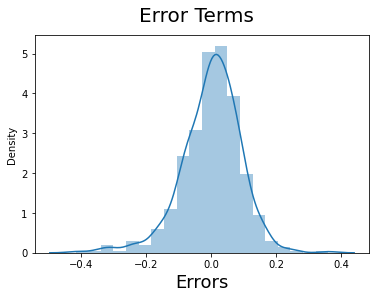

In [287]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  

Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.



# Making Predictions

In [293]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity'
vars = ['windspeed' , 'temp' , 'humidity','count']

df_test[vars] = scaler.transform(df_test[vars])

df_test.head()

,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2019,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Dividing into X_test and y_test

In [295]:
y_test = df_test.pop('count')
X_test = df_test

In [296]:
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [297]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

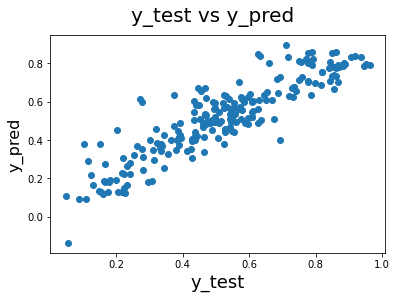

In [298]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

In [299]:
# Calculating R squared value for Test data set
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8035441330582012

In [300]:
n = X_test_new.shape[0]      

p = X_test_new.shape[1]    

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7931044493076708

### Comparison between the results on Train and Test datasets:

##### R-squared Value:


    Train set : 83.3%
    Test set : 80.4%

##### Adj R-squared Value:


    Train set : 83.0%
    Test set : 79.3%
    
    
As the Difference between R-squared Value and Adj R-squared Value of both train and test data set is less than 5% , therefore we can say it is a good model.

    const	      0.1910	
    holiday	     -0.0969	
    temp          0.4782	
    windspeed	 -0.1482	
    spring     	 -0.0551	
    summer	      0.0610	
    winter	      0.0959	
    2019	      0.2341	
    light rain & snow	-0.2860	
    mist & cloudy	-0.0801	
    Sep        	  0.0909	

##### The three most significant variables affecting the demand for shared bikes are :

###### temperature 
###### year 2019
###### season winter

as these features are having positive coefficients and an increase in them is going to result into an increase in the demand for shared bikes .